In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,1,6)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)

Epoch 1/10
587/587 [==============================] - 2s 2ms/step - loss: 0.8656 - accuracy: 0.5075 - val_loss: 0.7179 - val_accuracy: 0.5058
Epoch 2/10
587/587 [==============================] - 2s 3ms/step - loss: 6.4723 - accuracy: 0.4988 - val_loss: 0.7603 - val_accuracy: 0.4951
Epoch 3/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7124 - accuracy: 0.5020 - val_loss: 0.7386 - val_accuracy: 0.4928
Epoch 4/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7157 - accuracy: 0.5012 - val_loss: 0.7966 - val_accuracy: 0.5070
Epoch 5/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7203 - accuracy: 0.5019 - val_loss: 0.7205 - val_accuracy: 0.4913
Epoch 6/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7105 - accuracy: 0.5016 - val_loss: 0.7540 - val_accuracy: 0.4942
Epoch 7/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7124 - accuracy: 0.5059 - val_loss: 0.7160 - val_accuracy: 0.4896
Epoch 

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Create generator for augmented data
augmented_data = datagen.flow(train_data, train_labels, batch_size=32)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,1,6)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
model.fit(augmented_data, epochs=10, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


C:\Users\chido\miniconda3\envs\doodoo\Lib\site-packages\keras\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (18774, 1, 1, 6) (6 channels).
  warnings.warn(


Epoch 1/10
587/587 [==============================] - 18s 27ms/step - loss: 5.2555 - accuracy: 0.4963 - val_loss: 0.7021 - val_accuracy: 0.4957
Epoch 2/10
587/587 [==============================] - 16s 27ms/step - loss: 0.7158 - accuracy: 0.4965 - val_loss: 0.7361 - val_accuracy: 0.5072
Epoch 3/10
587/587 [==============================] - 16s 27ms/step - loss: 0.7401 - accuracy: 0.5029 - val_loss: 0.7139 - val_accuracy: 0.4934
Epoch 4/10
587/587 [==============================] - 15s 26ms/step - loss: 0.7109 - accuracy: 0.5029 - val_loss: 0.7216 - val_accuracy: 0.5066
Epoch 5/10
587/587 [==============================] - 17s 29ms/step - loss: 0.7083 - accuracy: 0.5058 - val_loss: 0.7007 - val_accuracy: 0.4949
Epoch 6/10
587/587 [==============================] - 17s 29ms/step - loss: 0.7063 - accuracy: 0.5018 - val_loss: 0.7028 - val_accuracy: 0.4938
Epoch 7/10
587/587 [==============================] - 17s 29ms/step - loss: 0.7057 - accuracy: 0.4970 - val_loss: 0.7306 - val_accuracy:

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


Epoch 1/10
587/587 [==============================] - 5s 4ms/step - loss: 0.7861 - accuracy: 0.5024 - val_loss: 0.6975 - val_accuracy: 0.5040
Epoch 2/10
587/587 [==============================] - 2s 4ms/step - loss: 0.7433 - accuracy: 0.5030 - val_loss: 0.7095 - val_accuracy: 0.5177
Epoch 3/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7151 - accuracy: 0.4942 - val_loss: 0.7189 - val_accuracy: 0.4806
Epoch 4/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7385 - accuracy: 0.4967 - val_loss: 0.7130 - val_accuracy: 0.4851
Epoch 5/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7079 - accuracy: 0.4948 - val_loss: 0.6959 - val_accuracy: 0.5196
Epoch 6/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7088 - accuracy: 0.5032 - val_loss: 0.7031 - val_accuracy: 0.5194
Epoch 7/10
587/587 [==============================] - 2s 3ms/step - loss: 0.7027 - accuracy: 0.4973 - val_loss: 0.6946 - val_accuracy: 0.4781
Epoch 

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input image size
IMG_SIZE = 224

# Load the VGG16 model without the top layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers in the pre-trained model
for layer in vgg16_base.layers:
    layer.trainable = False

# Build a new model on top of the pre-trained model
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set the training and validation data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('train', target_size=(IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory('val', target_size=(IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary')

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print('Accuracy:', accuracy)


58889256/58889256 [==============================] - 7s 0us/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train'

In [8]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
lr_model = DecisionTreeClassifier()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Calculate the accuracy of the model on the validation data
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.49105240732850447


In [11]:
# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Check if 'target' column is present
if 'target' not in data.columns:
    # Add the target column to the DataFrame
    data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']


In [13]:
# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,1,6)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)

ValueError: cannot reshape array of size 140808 into shape (23468,1,1,1)

In [15]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Print the dataframe to verify that the target column has been added
print(data.head())


# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Normalize the input data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Define the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(1,1,X.shape[3])),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model using data augmentation
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    steps_per_epoch=len(train_data) / 32,
                    epochs=50,
                    validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


   subject_id  icustay_id  heart_rate  blood_pressure  oxygen_saturation  \
0       94297    200697.0        93.0            94.0               98.0   
1       94229    219381.0        97.0            96.0               98.0   
2       94195    276193.0        82.0            96.0               97.0   
3       94256    241577.0        98.0           196.0               96.0   
4       93996    236789.0        98.0            92.0               99.0   

   respiratory_rate  temperature  Label  target  
0              39.0         36.0      1       0  
1              16.0         36.5      0       1  
2              25.0         36.3      1       1  
3              16.0         36.5      1       1  
4              28.0         37.2      1       1  


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d. Consider increasing the input size. Received input shape [None, 1, 1, 6] which would produce output shape with a zero or negative value in a dimension.

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(1,1,6)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


ValueError: Exception encountered when calling layer "max_pooling2d_3" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_3/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,32].

Call arguments received by layer "max_pooling2d_3" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 32), dtype=float32)

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 3), activation='relu', input_shape=(1, 1, X.shape[3])),
    tf.keras.layers.MaxPooling2D((1, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_5. Consider increasing the input size. Received input shape [None, 1, 1, 6] which would produce output shape with a zero or negative value in a dimension.

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1, 1, X.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)



ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_6. Consider increasing the input size. Received input shape [None, 1, 1, 6] which would produce output shape with a zero or negative value in a dimension.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Load the data
data = pd.read_csv('20thMarch_CVD.csv')
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data into images
img_height = 128
img_width = 128
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1)

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



ValueError: cannot reshape array of size 131418 into shape (18774,128,128,1)

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Load the data
data = pd.read_csv('20thMarch_CVD.csv')

# Drop unnecessary columns
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Separate features and labels
X = data.drop(['Label'], axis=1)
y = data['Label']

# Reshape the data for CNN model
X = X.to_numpy().reshape(-1, 1, 6, 1)

reshaped_data = np.reshape(data, (19557, 6, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 2), activation='relu', input_shape=(1, 6, 1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Conv2D(64, kernel_size=(1, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Conv2D(128, kernel_size=(1, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: cannot reshape array of size 117340 into shape (1,6,1)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Load data
data = pd.read_csv('20thMarch_CVD.csv')
X = data.drop(['subject_id', 'icustay_id', 'Label'], axis=1)
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for use in CNN
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (1, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((1, 2)))
model.add(Conv2D(64, (1, 3), activation='relu'))
model.add(MaxPooling2D((1, 2)))
model.add(Conv2D(128, (1, 3), activation='relu'))
model.add(MaxPooling2D((1, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_9. Consider increasing the input size. Received input shape [None, 1, 1, 32] which would produce output shape with a zero or negative value in a dimension.

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('20thMarch_CVD.csv')

# Drop subject_id and icustay_id
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Split into features and target
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the input shape of the model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (1, 3), padding='same', activation='relu', input_shape=(1, X_train.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((1, 2)),
    tf.keras.layers.Conv2D(64, (1, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 2)),
    tf.keras.layers.Conv2D(128, (1, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


ValueError: Exception encountered when calling layer "max_pooling2d_11" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_11/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 1, 2, 1], padding="VALID", strides=[1, 1, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_11" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('20thMarch_CVD.csv')
X = data.drop(['subject_id', 'icustay_id', 'Label'], axis=1).values
y = data['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for the CNN model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 3), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(1, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(1, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(1, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_13. Consider increasing the input size. Received input shape [None, 5, 1, 1] which would produce output shape with a zero or negative value in a dimension.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('20thMarch_CVD.csv')

# Split the data into features and target
X = data.drop(['subject_id', 'icustay_id', 'Label'], axis=1)
y = data['Label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for the CNN model
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


ValueError: Exception encountered when calling layer "max_pooling2d_15" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_15/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,5,1,32].

Call arguments received by layer "max_pooling2d_15" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 5, 1, 32), dtype=float32)

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load the dataset
df = pd.read_csv('20thMarch_CVD.csv')

# Drop unnecessary columns
df.drop(columns=['subject_id', 'icustay_id'], inplace=True)

# Convert the categorical labels to numerical labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the dataset into training and testing sets
X = df.drop(columns=['Label']).values
y = df['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the training and testing sets
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

# Convert the labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (6, 1), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])


# CNN
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
cnn = Sequential()
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32)
y_pred = cnn.predict(X_test_cnn)
y_pred = y_pred.flatten() # reshape to 1D array
cnn_acc = accuracy_score(y_test, np.round(y_pred))
cnn_cm = confusion_matrix(y_test, np.round(y_pred))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: Exception encountered when calling layer "conv2d_17" (type Conv2D).

Negative dimension size caused by subtracting 6 from 5 for '{{node conv2d_17/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_17/Conv2D/ReadVariableOp)' with input shapes: [?,5,1,1], [6,1,1,32].

Call arguments received by layer "conv2d_17" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 5, 1, 1), dtype=float32)

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Add the target column to the DataFrame
data['target'] = np.random.randint(0, 2, size=data.shape[0])

# Split the dataset into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Reshape the data
X = np.array(X)
X = X.reshape(X.shape[0], 1, 1, X.shape[1])

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Create generator for augmented data
augmented_data = datagen.flow(train_data, train_labels, batch_size=32)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,1,6)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
model.fit(augmented_data, epochs=50, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Accuracy:', accuracy)

# Make predictions using the model
predictions = model.predict(val_data)


Epoch 1/50


C:\Users\chido\miniconda3\envs\doodoo\Lib\site-packages\keras\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (18774, 1, 1, 6) (6 channels).
  warnings.warn(


587/587 [==============================] - 17s 27ms/step - loss: 0.8297 - accuracy: 0.4974 - val_loss: 0.7095 - val_accuracy: 0.4938
Epoch 2/50
587/587 [==============================] - 16s 27ms/step - loss: 2.3457 - accuracy: 0.4960 - val_loss: 0.9388 - val_accuracy: 0.4972
Epoch 3/50
587/587 [==============================] - 17s 29ms/step - loss: 0.7892 - accuracy: 0.4974 - val_loss: 0.7041 - val_accuracy: 0.5009
Epoch 4/50
587/587 [==============================] - 16s 28ms/step - loss: 0.7554 - accuracy: 0.5043 - val_loss: 0.7261 - val_accuracy: 0.5102
Epoch 5/50
587/587 [==============================] - 16s 27ms/step - loss: 0.7478 - accuracy: 0.4989 - val_loss: 0.8128 - val_accuracy: 0.5089
Epoch 6/50
587/587 [==============================] - 16s 27ms/step - loss: 0.7332 - accuracy: 0.4969 - val_loss: 0.7051 - val_accuracy: 0.5045
Epoch 7/50
587/587 [==============================] - 16s 27ms/step - loss: 0.7753 - accuracy: 0.5018 - val_loss: 0.7015 - val_accuracy: 0.5089
Epo

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Split the dataset into features and target
X = data.drop(['Label'], axis=1)
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape the data for the CNN model
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32)

# Evaluate the CNN model
y_pred = cnn.predict(X_test_cnn)
y_pred = y_pred.flatten() # reshape to 1D array
cnn_acc = accuracy_score(y_test, np.round(y_pred))
cnn_cm = confusion_matrix(y_test, np.round(y_pred))

# Print the accuracy and confusion matrix
print('Accuracy:', cnn_acc)
print('Confusion Matrix:\n', cnn_cm)


Epoch 1/10
587/587 [==============================] - 3s 3ms/step - loss: 2.1164 - accuracy: 0.7370
Epoch 2/10
587/587 [==============================] - 2s 3ms/step - loss: 0.3132 - accuracy: 0.9047
Epoch 3/10
587/587 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9376
Epoch 4/10
587/587 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9522
Epoch 5/10
587/587 [==============================] - 1s 3ms/step - loss: 0.1437 - accuracy: 0.9548
Epoch 6/10
587/587 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9557
Epoch 7/10
587/587 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9558
Epoch 8/10
587/587 [==============================] - 2s 3ms/step - loss: 0.1245 - accuracy: 0.9565
Epoch 9/10
587/587 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.9542
Epoch 10/10
147/147 [==============================] - 0s 2ms/step
Accuracy: 0.9646357051555177
Conf

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_auc_score

# Calculate the AUC value
auc_value = roc_auc_score(y_test, y_pred)

# Print the AUC value
print('AUC:', auc_value)




# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Remove irrelevant features
data = data.drop(['subject_id', 'icustay_id'], axis=1)

# Split the dataset into features and target
X = data.drop(['Label'], axis=1)
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape the data for the CNN model
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32)

# Evaluate the CNN model
y_pred = cnn.predict(X_test_cnn)
y_pred = y_pred.flatten() # reshape to 1D array
cnn_acc = accuracy_score(y_test, np.round(y_pred))
cnn_cm = confusion_matrix(y_test, np.round(y_pred))
cnn_cr = classification_report(y_test, np.round(y_pred))

# Print the accuracy, confusion matrix, and classification report
print('Accuracy:', cnn_acc)
print('Confusion Matrix:\n', cnn_cm)
print('Classification Report:\n', cnn_cr)

# Plot the confusion matrix
plot_confusion_matrix(cnn, X_test_cnn, y_test)


Epoch 1/10
587/587 [==============================] - 3s 3ms/step - loss: 1.0487 - accuracy: 0.7653
Epoch 2/10
587/587 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.8957
Epoch 3/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2718 - accuracy: 0.9164
Epoch 4/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2659 - accuracy: 0.9213
Epoch 5/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9239
Epoch 6/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2625 - accuracy: 0.9269
Epoch 7/10
587/587 [==============================] - 1s 3ms/step - loss: 0.2623 - accuracy: 0.9273
Epoch 8/10
587/587 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9292
Epoch 9/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2661 - accuracy: 0.9224
Epoch 10/10
147/147 [==============================] - 0s 2ms/step
Accuracy: 0.9352364720920324
Conf

NameError: name 'plot_confusion_matrix' is not defined

In [34]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


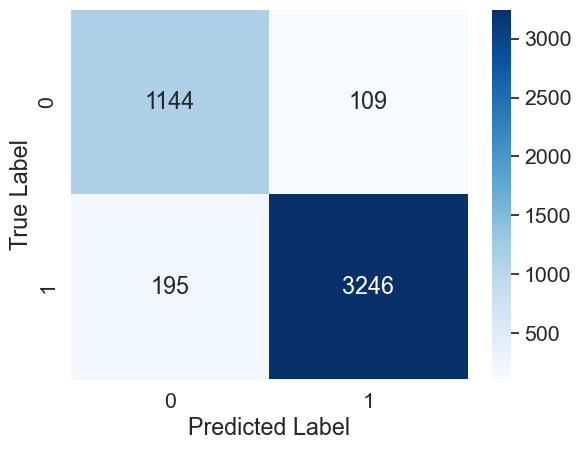

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.4) # adjust the font size
sns.heatmap(cnn_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('20thMarch_CVD.csv')

# Get the size of the dataset
dataset_size = data.shape[0]

# Print the dataset size
print("Dataset size:", dataset_size)


Dataset size: 23468


In [2]:
# Calculate the AUC value
auc_value = roc_auc_score(y_test, y_pred)

# Print the AUC value
print('AUC:', auc_value)

NameError: name 'roc_auc_score' is not defined